The following blocks run the original msprime program.

In [1]:
#This block sets up the simulation
import msprime
import numpy as np

Ne = 20000
L = 1e2  # Length of simulated region
num_reps = 100 #Lower number of reps because to ensure fast completion.

# define hard sweep model
sweep_model = msprime.SweepGenicSelection(
    position=(L // 2) - 1,  # middle of chrom
    start_frequency=1.0 / (2 * Ne),
    end_frequency=1-(1.0 / (2 * Ne)),
    s=0.2,
    dt=1e-6,
)

reps = msprime.sim_ancestry(
    5,
    model=[sweep_model, msprime.StandardCoalescent()],
    population_size=Ne,
    recombination_rate=1e-3,
    sequence_length=L,
    num_replicates=num_reps,
)

wins = np.linspace(0, L, 21)
mids = (wins[1:] + wins[:-1]) / 2
diversity = np.zeros((num_reps, mids.shape[0]))
for j, ts in enumerate(reps):
    diversity[j] = ts.diversity(windows=wins, mode="branch")

Print and format the reuslt.

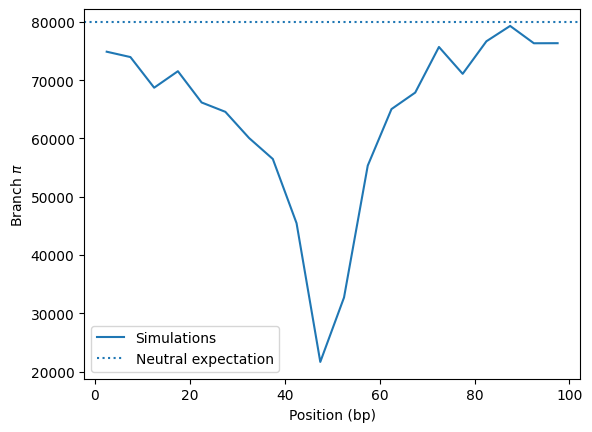

In [2]:
#This block plots the result.
from matplotlib import pyplot as plt

plt.plot(mids, diversity.mean(axis=0), label="Simulations")
plt.axhline(4 * Ne, linestyle=":", label=r'Neutral expectation')
plt.ylabel(r'Branch $\pi$');
plt.xlabel('Position (bp)')
plt.legend();
plt.show()

This code runs the algorithms.py file using the same parameters as above and prints the output. The first block defines the method used to complete the trees.

In [1]:
import msprime
import numpy as np
import sys, argparse
from algorithms import add_simulator_arguments
import tskit

def complete(file):
    Ne = 20000
    L = 100 
    num_reps = 100
    init_ts = tskit.load(file)
    
    reps = msprime.sim_ancestry(
        model=[msprime.StandardCoalescent()],
        initial_state=init_ts,
        population_size=Ne,
        recombination_rate=0.001,
        sequence_length=L,
        num_replicates=num_reps,
    )

    wins = np.linspace(0, L, 21)
    mids = (wins[1:] + wins[:-1]) / 2
    diversity = np.zeros((num_reps, mids.shape[0]))
    for j, ts in enumerate(reps):
        diversity[j] = ts.diversity(windows=wins, mode="branch")

    #This block plots the result.
    from matplotlib import pyplot as plt

    plt.plot(mids, diversity.mean(axis=0), label="Simulations")
    plt.ylabel(r'Branch $\pi$');
    plt.xlabel('Position (bp)')
    plt.axhline(4 * Ne, linestyle=":", label=r'Neutral expectation')
    plt.legend();
    plt.show()

    plt.plot(mids, diversity.mean(axis=0), label="Simulations")
    plt.ylabel(r'Branch $\pi$');
    plt.xlabel('Position (bp)')
    plt.legend();
    plt.show()


The second block runs the simulation and prints the output.

/Users/agushin/Desktop/msprime/msprime_selection/msprime/ancestry.py:904: TimeUnitsMismatchWarning: The initial_state has time_units=unknown but time is measured in generations in msprime. This may lead to significant discrepancies between the timescales. If you wish to suppress this warning, you can use, e.g., warnings.simplefilter('ignore', msprime.TimeUnitsMismatchWarning)
  warnings.warn(message, TimeUnitsMismatchWarning)
/Users/agushin/Desktop/msprime/msprime_selection/msprime/demography.py:1178: IncompletePopulationMetadataWarning: No metadata schema present in population table, not recording metadata
  warnings.warn(


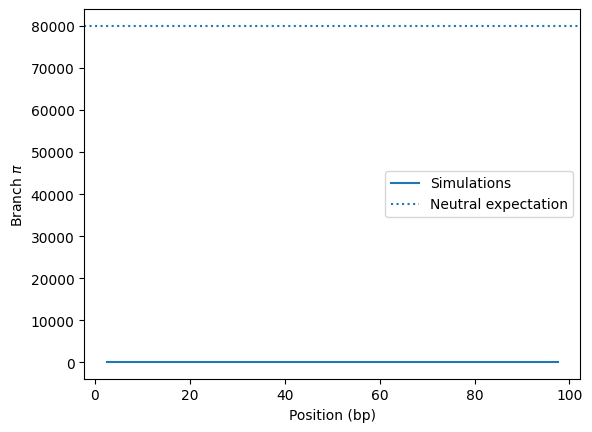

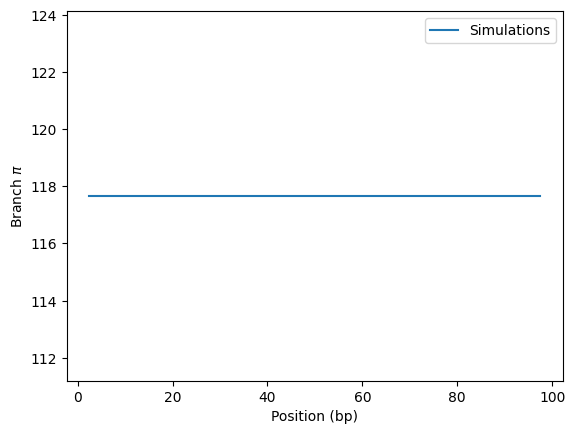

In [2]:
from algorithms import run_simulate

sys.argv = ['algorithms.py', "100", "out2.txt", "--model", "single_sweep", "--trajectory", "0.000025", "0.999975", "8000", "-r", "0.001"]
parser = argparse.ArgumentParser()
add_simulator_arguments(parser)
args = parser.parse_args()

run_simulate(args)
complete("out2.txt")